In [ ]:

import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/hello world/mitbih_train.csv")
df.shape

(87553, 188)

In [ ]:
pip install keras


In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')



In [ ]:
import pandas as pd

# Load the datasets

test_df = pd.read_csv('/content/drive/MyDrive/hello world/mitbih_test.csv', header=None)

# Check the balance of the dataset
test_df[187] = test_df[187].astype(int)
equilibre = test_df[187].value_counts()
print("Initial class distribution in training set:\n", equilibre)

Initial class distribution in training set:
 187
0    18118
4     1608
2     1448
1      556
3      162
Name: count, dtype: int64


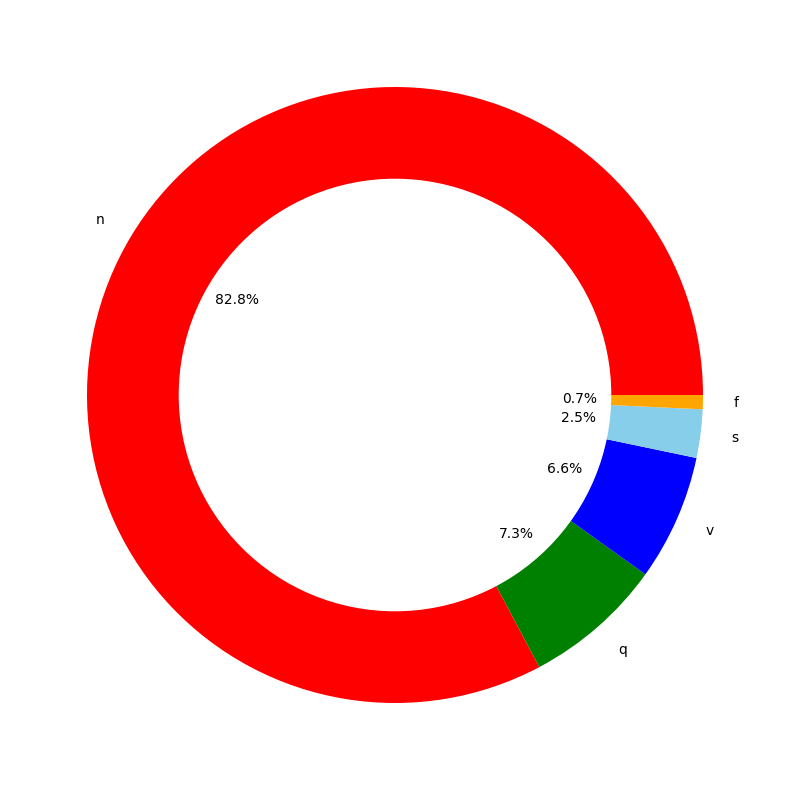

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=10000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=10000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=10000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=10000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=10000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

NameError: name 'train_df' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:



equilibre=train_df[187].value_counts()
print(equilibre)



187
0    10000
1    10000
2    10000
3    10000
4    10000
Name: count, dtype: int64


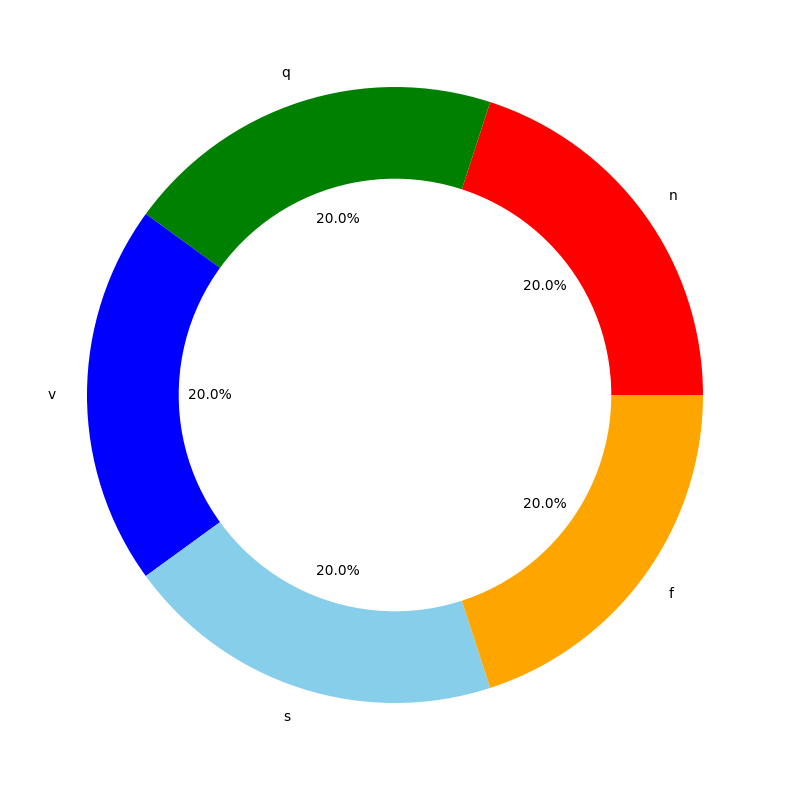

In [ ]:


plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



In [ ]:
PP7  K.K;U

Epoch 1/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8075 - loss: 0.8894 - val_accuracy: 0.8326 - val_loss: 0.6483
Epoch 2/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8244 - loss: 0.6685 - val_accuracy: 0.8326 - val_loss: 0.6463
Epoch 3/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8279 - loss: 0.6564 - val_accuracy: 0.8326 - val_loss: 0.6467
Epoch 4/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8254 - loss: 0.6581 - val_accuracy: 0.8814 - val_loss: 0.4640
Epoch 5/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8811 - loss: 0.4443 - val_accuracy: 0.9154 - val_loss: 0.3569
Epoch 6/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9185 - loss: 0.3364 - val_accuracy: 0.9267 - val_loss: 0.2946
Epoch 7/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9290 - loss: 0.2857 - val_accuracy: 0.9311 - val_loss: 0.2669
Epoch 8/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9301 - loss: 0.2656 -

In [ ]:
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Function to predict and print the class for a given test index
def predict_and_print_class(test_index):
    true_class = y_true[test_index]
    predicted_class = y_pred_classes[test_index]
    print(f'Index: {test_index}')
    print(f'Actual class: {class_names[true_class]}')
    print(f'Predicted class: {class_names[predicted_class]}')

# Example usage
test_index = 21891  # Change this to any index you want to test
predict_and_print_class(test_index)

Index: 21891
Actual class: Class 4
Predicted class: Class 4


In [ ]:
# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/hello world/mitbih_train.csv', header=None)
test_df = pd.read_csv('/content/drive/MyDrive/hello world/mitbih_test.csv', header=None)


In [ ]:
# Separate features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values


In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(20, input_shape=(187,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(5, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
2189/2189 [==============================] - 5s 2ms/step - loss: 0.7574 - accuracy: 0.8178 - val_loss: 0.6499 - val_accuracy: 0.8326
Epoch 2/10
2189/2189 [==============================] - 6s 3ms/step - loss: 0.6615 - accuracy: 0.8265 - val_loss: 0.6465 - val_accuracy: 0.8326
Epoch 3/10
2189/2189 [==============================] - 5s 2ms/step - loss: 0.6342 - accuracy: 0.8265 - val_loss: 0.4857 - val_accuracy: 0.8531
Epoch 4/10
2189/2189 [==============================] - 4s 2ms/step - loss: 0.4424 - accuracy: 0.8810 - val_loss: 0.3855 - val_accuracy: 0.9040
Epoch 5/10
2189/2189 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.9155 - val_loss: 0.3054 - val_accuracy: 0.9232
Epoch 6/10
2189/2189 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9264 - val_loss: 0.2733 - val_accuracy: 0.9315
Epoch 7/10
2189/2189 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9313 - val_loss: 0.2402 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


NameError: name 'model' is not defined

In [ ]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)


NameError: name 'model' is not defined

In [ ]:
# Extract weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights:", weights)
    print("Biases:", biases)


Weights: [[ 1.0034547  -0.16055605 -0.14718957 ...  0.10847515 -0.1010006
  -0.5788292 ]
 [ 0.86396784 -0.13412419  0.09324392 ...  0.14440389 -0.12246356
   0.5865179 ]
 [-0.26511583 -0.16705556 -0.32068583 ... -0.19451192 -0.19244787
   0.9917289 ]
 ...
 [ 0.31253695 -0.05436655 -0.38493    ... -0.07813209  0.13355641
   0.2629931 ]
 [ 0.30945942 -0.04704019 -0.30341798 ... -0.3465963   0.07179435
   0.12257688]
 [ 0.07780984  0.12345874 -0.55122477 ... -0.3304738   0.01727713
   0.37355533]]
Biases: [ 0.5349327  -0.01287085 -0.09961884  0.16740373  0.05238947 -0.04491479
  0.5536369   0.30685148  0.3186922   0.3001668   0.25232965  0.12037739
 -0.3503495   0.14038818  0.22226751  0.17924169  0.06486009 -0.09628069
 -0.05581605 -0.3814979 ]
Weights: [[-3.07189703e-01  9.47623700e-02  9.71270502e-01 -7.31243566e-03
  -1.92254138e+00  2.85090417e-01 -1.33344039e-01  3.37609917e-01
  -1.13879919e+00  3.75611931e-01]
 [ 3.64715457e-01  4.32284027e-01  3.11581343e-01 -3.22827101e-01
   3.

Fixed-point representation of 0.5: -9223372036854775808


In [ ]:
# Function to convert floating point to fixed point representation
def float_to_fixed(val, fraction_bits):
    scaling_factor = 2 ** fraction_bits
    return int(val * scaling_factor)

# Specify the number of fraction bits
fraction_bits = 8  # This can be adjusted based on the precision required

# Convert weights and biases to fixed-point representation
fixed_point_weights = []
fixed_point_biases = []

for layer in model.layers:
    weights, biases = layer.get_weights()
    fixed_weights = np.vectorize(float_to_fixed)(weights, fraction_bits)
    fixed_biases = np.vectorize(float_to_fixed)(biases, fraction_bits)
    fixed_point_weights.append(fixed_weights)
    fixed_point_biases.append(fixed_biases)

# Print fixed-point weights and biases
for i, (weights, biases) in enumerate(zip(fixed_point_weights, fixed_point_biases)):
    print(f"Layer {i} Fixed-Point Weights:\n", weights)
    print(f"Layer {i} Fixed-Point Biases:\n", biases)


Layer 0 Fixed-Point Weights:
 [[   0   79 -201 ...  250  123   13]
 [ -67  214  -65 ...  126   86  -27]
 [ 267  -62 -478 ... -180 -108   -7]
 ...
 [  76   34   73 ...   72   91  -18]
 [ 103   40   97 ...   60   71  -11]
 [ 108  -21  161 ...   92    1  -38]]
Layer 0 Fixed-Point Biases:
 [134 -13 113 -37 -18  54  55 -77 -92  -2  28  25 101 -92  10 128  41  21
  20 -13]
Layer 1 Fixed-Point Weights:
 [[-127 -142   16   -7  -94 -361  -37    7  125  152]
 [ 267 -247  290  -86  129 -493  334  388 -430  117]
 [ -99   52  115  302 -411  150 -150 -154  254  228]
 [-330 -233  -65  -24    1   34   74 -102  163 -134]
 [ -82  -66  -98  -45  -52  -10  -58  -58   14  -90]
 [ 154    7  178  281 -462  185  -66  158 -175  162]
 [-226 -302 -271 -352  -30   73  149 -397 -161  297]
 [-387  267  234  -40 -178  -55  163  187  -38  -14]
 [ -98   29 -149 -359 -218   44   53 -283  -67  -65]
 [-167 -231 -377  170    8 -564  349 -219   62 -176]
 [ 360  109  299  138  372  405  187  256 -305 -369]
 [  64 -100 -145 

In [ ]:
import numpy as np

def int_to_bin(val, bit_width):
    """Convert an integer to a custom binary representation."""
    if bit_width != 11:
        raise ValueError("Bit width must be 11 for the specified format (1 sign bit, 2 integer bits, 8 fractional bits).")

    sign_bit = 1 if val < 0 else 0
    abs_val = abs(val)
    integer_part = abs_val >> 8  # 2 bits for integer part
    fractional_part = abs_val & 0xFF  # 8 bits for fractional part

    return f'{sign_bit}{integer_part:02b}{fractional_part:08b}'

def convert_fixed_point_to_binary(fixed_point_weights, fixed_point_biases):
    """Convert fixed-point weights and biases to custom binary representation."""
    binary_weights = []
    binary_biases = []

    for weights, biases in zip(fixed_point_weights, fixed_point_biases):
        # Convert each weight and bias to custom binary representation
        bin_weights = np.vectorize(int_to_bin)(weights, 11)
        bin_biases = np.vectorize(int_to_bin)(biases, 11)
        binary_weights.append(bin_weights)
        binary_biases.append(bin_biases)

    return binary_weights, binary_biases

def print_binary_layers(binary_weights, binary_biases):
    """Print the custom binary representation of weights and biases for each layer."""
    for i, (weights, biases) in enumerate(zip(binary_weights, binary_biases)):
        print(f"Layer {i} Custom Binary Weights:\n", weights)
        print(f"Layer {i} Custom Binary Biases:\n", biases)
          # Example fixed-point biases

# Convert fixed-point values to custom binary representation
binary_weights, binary_biases = convert_fixed_point_to_binary(fixed_point_weights, fixed_point_biases)

# Print custom binary weights and biases
print_binary_layers(binary_weights, binary_biases)


Layer 0 Custom Binary Weights:
 [['00100000000' '10000101001' '10000100101' ... '00000011011'
  '10000011001' '10010010100']
 ['00011011101' '10000100010' '00000010111' ... '00000100100'
  '10000011111' '00010010110']
 ['10001000011' '10000101010' '10001010010' ... '10000110001'
  '10000110001' '00011111101']
 ...
 ['00001010000' '10000001101' '10001100010' ... '10000010100'
  '00000100010' '00001000011']
 ['00001001111' '10000001100' '10001001101' ... '10001011000'
  '00000010010' '00000011111']
 ['00000010011' '00000011111' '10010001101' ... '10001010100'
  '00000000100' '00001011111']]
Layer 0 Custom Binary Biases:
 ['00010001000' '10000000011' '10000011001' '00000101010' '00000001101'
 '10000001011' '00010001101' '00001001110' '00001010001' '00001001100'
 '00001000000' '00000011110' '10001011001' '00000100011' '00000111000'
 '00000101101' '00000010000' '10000011000' '10000001110' '10001100001']
Layer 1 Custom Binary Weights:
 [['10001001110' '00000011000' '00011111000' '10000000001

In [ ]:
# Function to convert an integer to a binary string
def int_to_bin(val, bit_width):
    return format(val if val >= 0 else (1 << bit_width) + val, f'0{bit_width}b')

# Specify the bit width for fixed-point representation
bit_width = 16  # This can be adjusted based on the precision and hardware capability

# Convert fixed-point values to binary representation
binary_weights = []
binary_biases = []

for weights, biases in zip(fixed_point_weights, fixed_point_biases):
    bin_weights = np.vectorize(int_to_bin)(weights, bit_width)
    bin_biases = np.vectorize(int_to_bin)(biases, bit_width)
    binary_weights.append(bin_weights)
    binary_biases.append(bin_biases)

# Print binary weights and biases
for i, (weights, biases) in enumerate(zip(binary_weights, binary_biases)):
    print(f"Layer {i} Binary Weights:\n", weights)
    print(f"Layer {i} Binary Biases:\n", biases)


Layer 0 Binary Weights:
 [['0000000100000000' '1111111111010111' '1111111111011011' ...
  '0000000000011011' '1111111111100111' '1111111101101100']
 ['0000000011011101' '1111111111011110' '0000000000010111' ...
  '0000000000100100' '1111111111100001' '0000000010010110']
 ['1111111110111101' '1111111111010110' '1111111110101110' ...
  '1111111111001111' '1111111111001111' '0000000011111101']
 ...
 ['0000000001010000' '1111111111110011' '1111111110011110' ...
  '1111111111101100' '0000000000100010' '0000000001000011']
 ['0000000001001111' '1111111111110100' '1111111110110011' ...
  '1111111110101000' '0000000000010010' '0000000000011111']
 ['0000000000010011' '0000000000011111' '1111111101110011' ...
  '1111111110101100' '0000000000000100' '0000000001011111']]
Layer 0 Binary Biases:
 ['0000000010001000' '1111111111111101' '1111111111100111'
 '0000000000101010' '0000000000001101' '1111111111110101'
 '0000000010001101' '0000000001001110' '0000000001010001'
 '0000000001001100' '000000000100

In [ ]:
def write_to_mem_file(data, filename):
    with open(filename, 'wb') as file:
        for row in data:
            # Ensure row is a bytes object (if it's not already)
            if not isinstance(row, bytes):
                row = bytes(row, 'utf-8')  # Assuming 'utf-8' encoding for conversion

            file.write(row + b'\n')  # Write binary data to file

# Example usage:
# Assume binary_weights and binary_biases are lists or arrays containing binary data

# Write weights and biases to mem files
for i, (weights, biases) in enumerate(zip(binary_weights, binary_biases)):
    # Flatten the list of lists or NumPy array if needed
    weights_flat = weights.flatten()
    biases_flat = biases.flatten()

    write_to_mem_file(weights_flat, f'layer_{i}_weights.mem')
    write_to_mem_file(biases_flat, f'layer_{i}_biases.mem')


In [ ]:
# Function to write binary data to a mem file
def write_to_mem_file(data, filename):
    with open(filename, 'w') as file:
        for row in data:
            # Convert binary string to hexadecimal representation
            hex_data = hex(int(str(row), 2))[2:].zfill((len(row) + 3) // 4)
            file.write(hex_data + '\n')

# Write weights and biases to mem files
for i, (weights, biases) in enumerate(zip(binary_weights, binary_biases)):
    # Flatten the list of lists or NumPy array
    weights_flat = weights.flatten()
    biases_flat = biases.flatten()

    write_to_mem_file(weights_flat, f'layer_{i}_weights.mem')
    write_to_mem_file(biases_flat, f'layer_{i}_biases.mem')


In [ ]:
import numpy as np
import pandas as pd

def float_to_fixed_point(value, bit_width, frac_bits):
    scale = 2 ** frac_bits
    fixed_value = np.round(value * scale).astype(np.int32)
    return fixed_value

def int_to_bin(value, bit_width):
    if value < 0:
        value = (1 << bit_width) + value
    return format(value, f'0{bit_width}b')

def convert_to_binary(data, bit_width, frac_bits):
    fixed_point_data = float_to_fixed_point(data, bit_width, frac_bits)
    binary_data = np.vectorize(int_to_bin)(fixed_point_data, bit_width)
    return binary_data

def write_to_mem_files(data, file_prefix, rows_per_file):
    num_files = int(np.ceil(data.shape[0] / rows_per_file))
    for i in range(num_files):
        start_idx = i * rows_per_file
        end_idx = min((i + 1) * rows_per_file, data.shape[0])
        file_data = data[start_idx:end_idx]
        file_name = f'{file_prefix}_{i}.mem'
        with open(file_name, 'w') as file:
            for row in file_data:
                hex_data = ''.join([hex(int(''.join(elem), 2))[2:].zfill((len(elem) + 3) // 4) for elem in row])
                file.write(hex_data + '\n')

# Load the dataset
file_path = '/content/drive/MyDrive/hello world/mitbih_test.csv'
data = pd.read_csv(file_path)

# Parameters
bit_width = 16
frac_bits = 8
rows_per_file = 100  # Adjust based on your Verilog code's capability

# Convert data to binary
binary_data = convert_to_binary(data.values, bit_width, frac_bits)

# Write binary data to .mem files
write_to_mem_files(binary_data, 'mitbih_test', rows_per_file)


In [ ]:
import os

# Directory containing the .mem files
output_dir = '/content/output_mem_files'  # Update this with your correct directory path
concatenated_file = '/content/concatenated_mem_file.mem'

# Check if the directory exists
if not os.path.exists(output_dir):
    print(f"Directory {output_dir} does not exist.")
else:
    # List all .mem files in the directory
    mem_files = sorted([f for f in os.listdir(output_dir) if f.endswith('.mem')])

    if not mem_files:
        print("No .mem files found in the directory.")
    else:
        # Concatenate all .mem files into a single file
        with open(concatenated_file, 'w') as outfile:
            for fname in mem_files:
                with open(os.path.join(output_dir, fname)) as infile:
                    for line in infile:
                        outfile.write(line)
        print(f"Concatenated file created at {concatenated_file}")


Directory /content/output_mem_files does not exist.


In [ ]:
import numpy as np

def convert_to_verilog(input_file, module_name, data_width, addr_width):
    # Load binary data from file
    with open(input_file, 'rb') as f:
        # Read binary data as bytes
        binary_data = f.read()

    # Calculate the number of words needed in the ROM
    num_words = len(binary_data) * 8 // data_width

    # Write Verilog code to a file
    with open(f'{module_name}.v', 'w') as f:
        f.write(f'module {module_name} (\n')
        f.write('    input [{}:0] addr,\n'.format(addr_width - 1))
        f.write('    output reg [{}:0] data\n'.format(data_width - 1))
        f.write(');\n\n')
        f.write(f'    reg [{data_width - 1}:0] rom [0:{num_words-1}];\n\n')

        # Initialize ROM with binary data
        f.write('    initial begin\n')
        for i in range(num_words):
            byte_offset = i * data_width // 8
            bit_offset = i * data_width % 8
            value = int.from_bytes(binary_data[byte_offset:byte_offset + (data_width // 8)], byteorder='big')
            f.write(f'        rom[{i}] = {data_width}\'b{value:0{data_width}};\n')
        f.write('    end\n\n')

        # Output data based on address
        f.write('    always @(addr) begin\n')
        f.write('        case (addr)\n')
        f.write(f'            {addr_width}\'d0: data = rom[addr];\n')
        f.write('            default: data = {data_width}\'b0;\n')
        f.write('        endcase\n')
        f.write('    end\n')
        f.write('endmodule\n')

# Example usage
convert_to_verilog('layer_1_weights.mem', 'Weights_Layer1_ROM', 8, 9)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/hello world/mitbih_test.csv', header=None)
test_df.shape

In [ ]:
df_s=pd.read_csv("/content/resampled_data.csv")
df_s.shape

(50000, 188)

In [ ]:
hello=df_s.head(2)
hello

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hello.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
import numpy as np
import pandas as pd
test_df = pd.read_csv('/content/drive/MyDrive/hello world/mitbih_train.csv', header=None)
test_df.shape

(87554, 188)

In [ ]:
hello= test_df.iloc[-4]
hello


0      0.718333
1      0.605000
2      0.486667
3      0.361667
4      0.231667
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    4.000000
Name: 87550, Length: 188, dtype: float64

In [ ]:
import numpy as np

# Function to convert floating point to fixed point representation
def float_to_fixed(val, fraction_bits):
    scaling_factor = 2 ** fraction_bits
    return np.round(val * scaling_factor).astype(np.int32)

# Example usage:
if __name__ == "__main__":
    # Example input numpy array (replace with your actual array)
    numpy_array = np.array(hello)

    # Specify the number of fraction bits
    fraction_bits = 8  # This can be adjusted based on the precision required

    # Convert to fixed-point representation
    fixed_array = float_to_fixed(numpy_array, fraction_bits)

    # Example to convert fixed-point values to binary representation
    bit_width = 16  # Example bit width
    binary_array = np.array([format(val & ((1 << bit_width) - 1), f'0{bit_width}b') for val in fixed_array])

    # Save binary_array to a text file
    np.savetxt('train_ip_4.txt', binary_array, fmt='%s')

    # Print the fixed-point array and binary array (for verification)
    print("Input Numpy Array:\n", numpy_array)
    print(f"Fixed-Point Array with {fraction_bits} fraction bits:\n", fixed_array)
    print("Binary Array:\n", binary_array)


Input Numpy Array:
 [7.18333304e-01 6.05000019e-01 4.86666679e-01 3.61666679e-01
 2.31666669e-01 1.19999997e-01 5.16666658e-02 1.66666671e-03
 0.00000000e+00 1.33333337e-02 7.83333331e-02 1.83333337e-01
 2.75000006e-01 3.14999998e-01 3.61666679e-01 4.30000007e-01
 4.81666654e-01 5.26666641e-01 5.43333352e-01 5.63333333e-01
 5.81666648e-01 5.88333309e-01 6.00000024e-01 6.03333354e-01
 6.13333344e-01 6.21666670e-01 6.36666656e-01 6.51666641e-01
 6.65000021e-01 6.81666672e-01 6.99999988e-01 7.11666644e-01
 7.35000014e-01 7.63333321e-01 7.85000026e-01 8.10000002e-01
 8.34999979e-01 8.56666684e-01 8.76666665e-01 8.79999995e-01
 8.81666660e-01 8.65000010e-01 8.36666644e-01 8.08333337e-01
 7.58333325e-01 7.08333313e-01 6.68333352e-01 6.23333335e-01
 5.86666644e-01 5.45000017e-01 5.19999981e-01 5.18333316e-01
 5.09999990e-01 4.98333335e-01 5.03333330e-01 5.00000000e-01
 5.01666665e-01 5.01666665e-01 5.01666665e-01 4.98333335e-01
 5.04999995e-01 5.04999995e-01 4.98333335e-01 4.98333335e-01
 5.0